Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/20
25/25 - 4s - loss: 0.7045 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 3s - loss: 0.6849 - accuracy: 0.4500 - val_loss: 0.6592 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 2s - loss: 0.6459 - accuracy: 0.6100 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 2s - loss: 0.7054 - accuracy: 0.4300 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 3s - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 3s - loss: 0.6886 - accuracy: 0.5100 - val_loss: 0.6687 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 2s - loss: 0.6420 - accuracy: 0.6300 - val_loss: 0.7654 - val_accuracy: 0.5500
Epoch 8/20
25/25 - 2s - loss: 0.6645 - accuracy: 0.6600 - val_loss: 0.5754 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 2s - loss: 0.6721 - accuracy: 0.6400 - val_loss: 0.5982 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 2s - loss: 0.6046

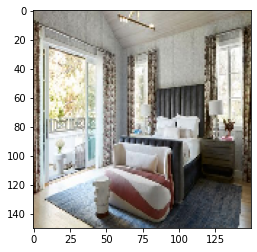

In [12]:
import zipfile, os
local_zip = 'messy-vs-clean-room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')


# AUGMENTASI GAMBAR PADA Setiap Sampel Datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

# Test
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

# Persiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
    train_dir, # directory data yang akan dilatih
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    #klasifikasi 2 class maka menggunakan binary
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary'
)



# Membangun arsiteksur CNN 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    # compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

# latih model dengan model.fit

model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)



# TESTING MENGGUNAKAN IMAGE
import numpy as np
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
     
# change it to your filename
fn = 'rapih.jpg'
     
# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
     
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
      
print(fn)
if classes==0:
    print('clean')
else:
    print('messy')